> Loading Libraries and Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


## We can see that TotalCharges is of object types which is not correct. So, we need change the type.

In [11]:
empty_total_charges = df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].index
empty_total_charges
df.drop(empty_total_charges,inplace=True)

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
df.shape

(7032, 21)

## I dont need customerID for model training. Hence I am dropping it.  

In [14]:
df.drop('customerID',inplace=True,axis=1)

In [15]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [16]:
df.Churn.unique()

array(['No', 'Yes'], dtype=object)

## Plotting Histogram for Tenure to find out in what range of tenure customers are leaving the most

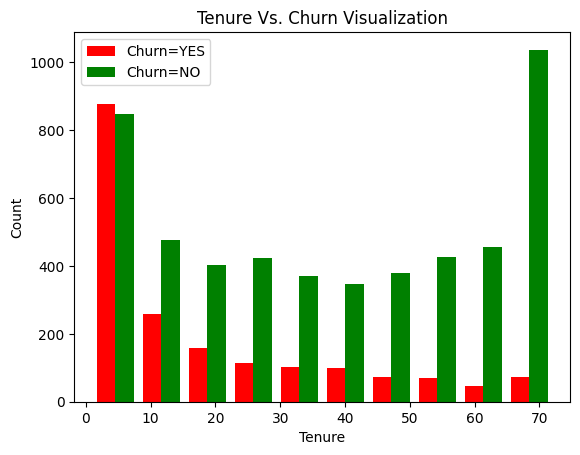

In [17]:
tenure_churn_yes = df[df['Churn'] == 'Yes']['tenure']
tenure_churn_no = df[df['Churn'] == 'No']['tenure']

plt.hist([tenure_churn_yes,tenure_churn_no],color=['red','green'],label=['Churn=YES','Churn=NO'])
plt.title('Tenure Vs. Churn Visualization')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

### If I want describe the above plot, I would say the customers who's been with the company for a short amount of time (like 10 month) are mostly likely to leave the company

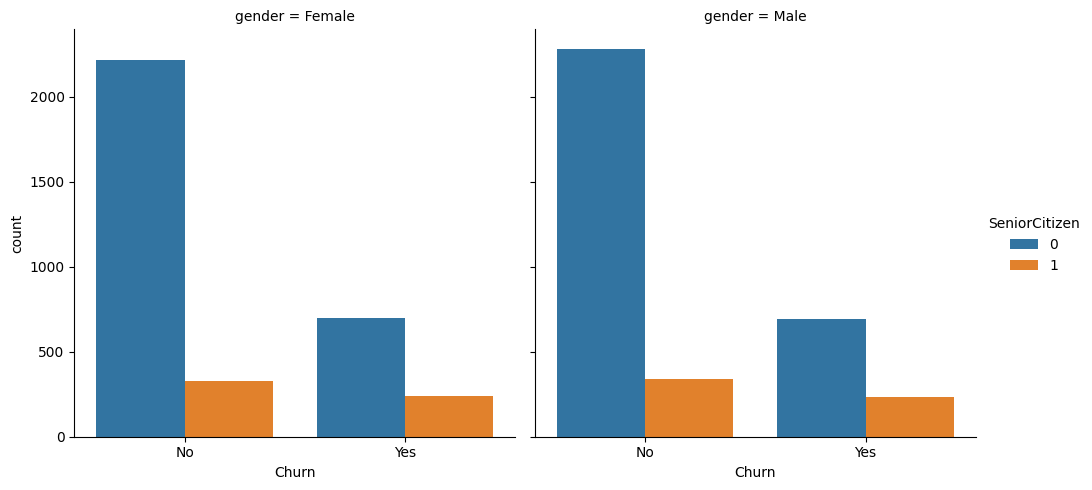

In [18]:
sns.catplot(data=df,x='Churn',kind='count',col='gender',hue='SeniorCitizen')
plt.show()

# sns.countplot(df,x='Churn',hue='gender')
# plt.show()

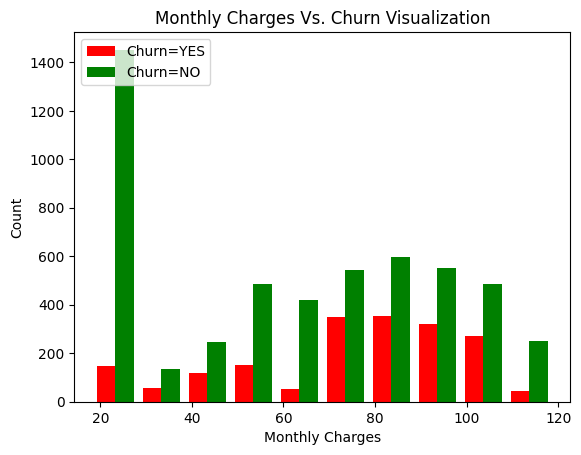

In [19]:
mc_churn_yes = df[df['Churn'] == 'Yes']['MonthlyCharges']
mc_churn_no = df[df['Churn'] == 'No']['MonthlyCharges']

plt.hist([mc_churn_yes,mc_churn_no],color=['red','green'],label=['Churn=YES','Churn=NO'])
plt.title('Monthly Charges Vs. Churn Visualization')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

### When monthly charges is around 20, so many customers are not leaving at that charge. But, when the charges get around 70-100, the customers tend to leave the service.

## Now, I'm going to label encode the categorical column. But first, I need to find out the categorical columns

In [20]:
def print_unique_col_value(df):
  for col in df:
    if df[col].dtypes == 'object':
      print(f"{col} : {df[col].unique()}")

In [21]:
print_unique_col_value(df)
df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [22]:
print_unique_col_value(df)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


## encoding Yes,No columns

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

yes_no_col = ['gender','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_col:
  df[col] = le.fit_transform(df[col])

In [24]:
for col in df:
      print(f"{col} : {df[col].unique()}")

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


## One hot encoding for InternetService, Contract, PaymentMethod





In [25]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],dtype=int)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [26]:
df.sample(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4781,1,0,0,0,53,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4288,1,0,0,1,3,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
525,1,0,0,0,52,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4669,1,0,0,0,51,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [27]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


## Okay, Now I have to find out if there is any outlier value in `tenure`, `MonthlyCharges` and `TotalCharges` Column

['tenure', 'MonthlyCharges', 'TotalCharges']


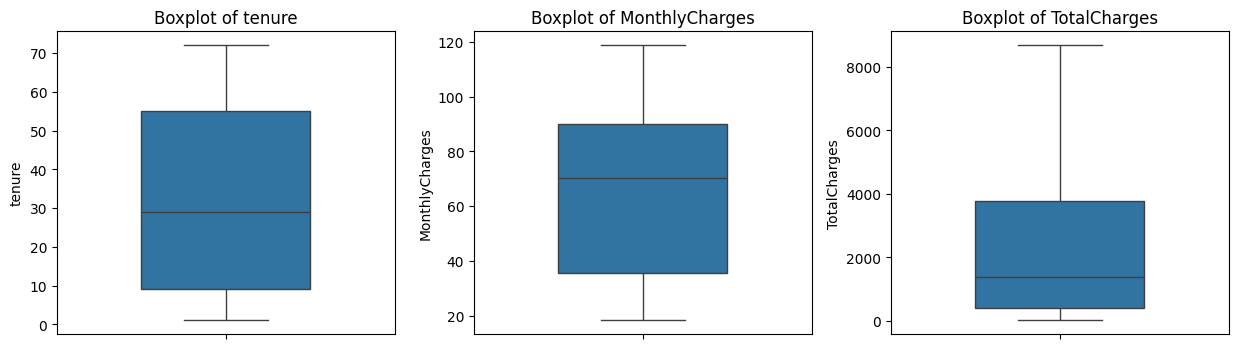

In [28]:
df_col = ['tenure','MonthlyCharges','TotalCharges']

available_cols = [col for col in df_col if col in df.columns]
print(available_cols)

plt.figure(figsize=(25, 10))
for i, col in enumerate(available_cols, 1):
    plt.subplot(3, 6, i)
    sns.boxplot(y=df[col],width=0.5)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

### We can observe that no outlier value exists inside these columns
## Now we will move on to the next part, which is to scale these columns, the reason is deep learning model needs scaled data for training. And we can see that other columns are categorical.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_col = ['tenure','MonthlyCharges','TotalCharges']
available_cols = [col for col in df_col if col in df.columns]

df[available_cols] = scaler.fit_transform(df[available_cols])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [30]:
def min_max(col_list):
  for col in col_list:
    print(f"{col} Min {df[col].min()}")
    print(f"{col} Max {df[col].max()}")
min_max(available_cols)

tenure Min 0.0
tenure Max 1.0
MonthlyCharges Min 0.0
MonthlyCharges Max 0.9999999999999999
TotalCharges Min 0.0
TotalCharges Max 0.9999999999999999


## I believe the dataset is now ready for training on deep learning model. But first, we need to split the dataset to train and test.

In [31]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=13)

In [32]:
# X_train.shape
# X_test.shape
# y_train.shape
# y_test.shape



> Define Artificial Neural Network



In [40]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential({
  keras.layers.Dense(20,input_shape=(26,),activation='relu'),
  # keras.layers.Dense(15,activation='relu'),
  keras.layers.Dense(1,activation='sigmoid')
})

model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

## Model Training

In [41]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5898 - loss: 0.6455
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7806 - loss: 0.4492
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7927 - loss: 0.4365
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7935 - loss: 0.4305
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8031 - loss: 0.4226
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8088 - loss: 0.4230
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8078 - loss: 0.4122
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8011 - loss: 0.4298
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8114 - loss: 0.4056
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8087 - loss: 0.4176
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8117 - loss: 0.4090
Epoch 12/100
176/176 ━━━━━━━━━━━━━━━━━━━━

## Evaluating the model

In [42]:
model.evaluate(X_test,y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7807 - loss: 0.4280


[0.4243837893009186, 0.7882018685340881]

## Prediction

In [44]:
y_pd = model.predict(X_test)

print(y_pd[:5])
print(y_test[:5])

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
[[0.098612  ]
 [0.28115046]
 [0.04985595]
 [0.43700626]
 [0.35781083]]
5225    0
1593    0
3629    0
6032    1
1299    1
Name: Churn, dtype: int64


### We have used sigmoid function for output layer. The default threshold for sigmoid is 0.5. Now we have to set our prediction so that if prediction > threshold the ouput will be 1, otherwise 0.

In [45]:
y_pred = []
for el in y_pd:
  if el > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [47]:
print(y_pred[:5])
print(y_test[:5])

[0, 0, 0, 0, 0]
5225    0
1593    0
3629    0
6032    1
1299    1
Name: Churn, dtype: int64


## We will see confusion matrix and classification report now

In [48]:
from sklearn.metrics import confusion_matrix,classification_report


print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1043
           1       0.60      0.55      0.57       364

    accuracy                           0.79      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



## Confusion Matrix

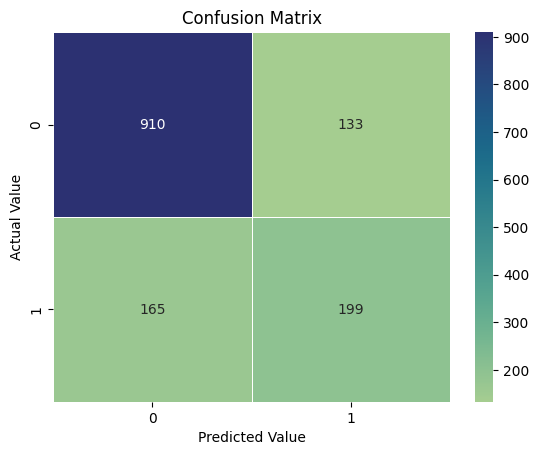

In [57]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d',cmap='crest',linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()